In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm

In [2]:
from TO_sim.Get_2ndR_NORM import get_r_rp
from TO_sim.Get_2ndR_Lorentzian import get_r_rp as get_r_rN

In [126]:
# m  = 
# F_r = get_r_rp(m,0)
F_rN = get_r_rN(m,0)
K_ = np.linspace(0,10,1000)

/Users/kimgug-young/Desktop/KURAMOTO 1st order/Kuramoto-model/TO_sim/Get_2ndR_NORM.py:156: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  I_l,err = quad(integrand_Rl2, shift_O,+omega_p,args=(X,O_pm,shift_O,m),limit=200)
/Users/kimgug-young/Desktop/KURAMOTO 1st order/Kuramoto-model/TO_sim/Get_2ndR_NORM.py:157: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  I_d,err = quad(integrand_Rd2, omega_p,np.inf,args=(X,O_pm,shift_O,m),limit=200)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: invalid value encountered in F_sec (vectorized)
  outputs = ufunc(*inputs)
/Users/kimgug-young/Desktop/KURAMOTO 1st order/Kuramoto-model/TO_sim/Get_2ndR_Lorentzian.py:157: IntegrationWarning:

NameError: name 'K_' is not defined

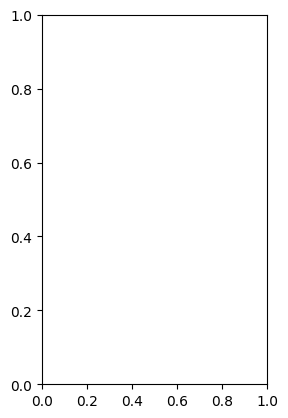

In [80]:
Ks = F_r['Ks']
plt.subplot(121)
plt.plot(K_,F_r['R_u'](K_))
plt.plot(K_,F_r['R0_u'](K_))
plt.plot(K_,F_r['R_d'](K_))

plt.plot(K_,(F_r['R0_u'](K_)-F_r['R_u'](K_))/2)

plt.plot(Ks,F_r['r_+u'])
plt.plot(Ks,F_r['r_+u'])

plt.subplot(122)

Ks = F_r['Ks']
plt.plot(K_,F_rN['R_u'](K_))
plt.plot(K_,F_rN['R0_u'](K_))
plt.plot(K_,F_rN['R_d'](K_))

plt.plot(K_,(F_rN['R0_u'](K_)-F_rN['R_u'](K_))/2)

plt.plot(Ks,F_rN['r_+u'])
plt.plot(Ks,F_rN['r_+u'])

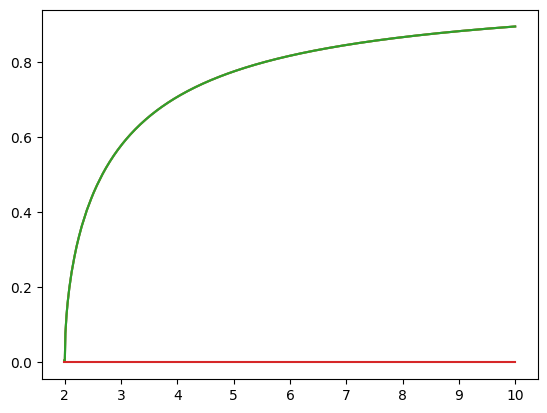

In [83]:
F = F_rN
Ks = F['Ks']
plt.plot(K_,F['R_u'](K_))
plt.plot(K_,F['R0_u'](K_))
plt.plot(K_,F['R_d'](K_))

plt.plot(K_,(F['R0_u'](K_)-F['R_u'](K_))/2)

plt.plot(Ks,F['r_+u'])
plt.plot(Ks,F['r_+u'])

In [91]:
ms = np.linspace(0,10,101)

In [92]:
R_U = []
R_D = []
R0U = []
R0D = []
R_P = []
RP0 = []

for m in tqdm(ms):
    F_r = get_r_rp(m,0,K_len=101)
    Ks = F_r['Ks']
    R_U.append(F_r['R_u'](Ks))
    R_D.append(F_r['R_d'](Ks))
    R0D.append(F_r['R0_d'](Ks))
    R0U.append(F_r['R0_u'](Ks))
    R_P.append(F_r['r_+u'])
    RP0.append(F_r['r_+0u'])


  0%|          | 0/101 [00:00<?, ?it/s]

/Users/kimgug-young/Desktop/KURAMOTO 1st order/Kuramoto-model/TO_sim/Get_2ndR_NORM.py:88: RuntimeWarning: divide by zero encountered in scalar divide
  a = 1/np.sqrt(X*m)
/Users/kimgug-young/Desktop/KURAMOTO 1st order/Kuramoto-model/TO_sim/Get_2ndR_NORM.py:89: RuntimeWarning: invalid value encountered in scalar subtract
  b = 4/np.pi * a - 0.3056*a**3
/Users/kimgug-young/Desktop/KURAMOTO 1st order/Kuramoto-model/TO_sim/Get_2ndR_NORM.py:156: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  I_l,err = quad(integrand_Rl2, shift_O,+omega_p,args=(X,O_pm,shift_O,m),limit=200)
/Users/kimgug-young/Desktop/KURAMOTO 1st order/Kuramoto-model/TO_sim/Get_2ndR_NORM.py:157: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  I_d,err = quad(integrand_Rd2, omega_p,np.inf,a

In [98]:
R_D = np.array(R_D)
R_U = np.array(R_U)
R0U = np.array(R0U)

In [99]:
R_P = np.array(R_P)
RP0 = np.array(RP0)

R_C = np.array(R0U- R_U)/2

In [100]:
xx=np.where(R_P>=R_C,R_P,np.nan)
xx=np.where(R_P<=(1-R0U)/2,R_P,np.nan)

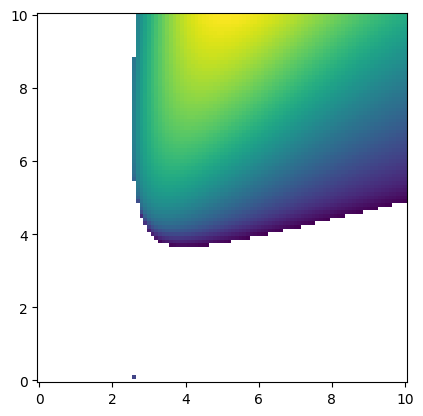

In [103]:
plt.pcolormesh(Ks,ms,RP0)
plt.gca().set_aspect(1)

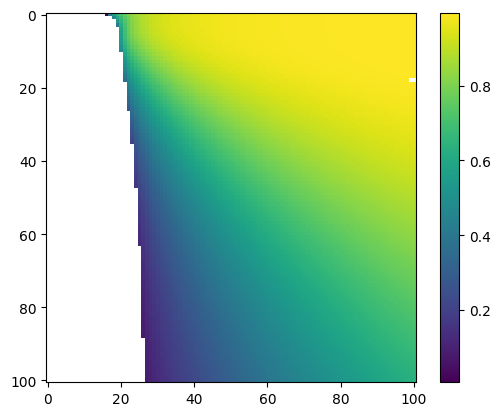

In [102]:
plt.imshow(R_U)
# plt.pcolormesh(Ks,ms,)
# plt.pcolormesh(Ks,ms,RP0)
# plt.pcolormesh(Ks,ms,R_U)
# plt.pcolormesh(Ks,ms,R_P,alpha=0.3)
plt.colorbar()
plt.gca().set_aspect(1)

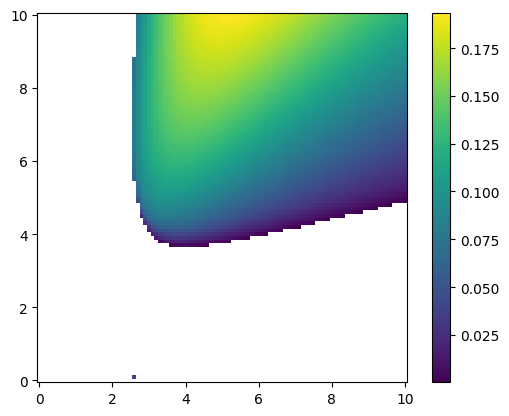

In [104]:
# plt.imshow(R_D)
# plt.imshow(R_D)
# plt.pcolormesh(Ks,ms,)
# plt.pcolormesh(Ks,ms,RP0)
plt.pcolormesh(Ks,ms,xx)
# plt.pcolormesh(Ks,ms,R_P,alpha=0.3)
plt.colorbar()
plt.gca().set_aspect(1)

In [105]:
np.savez('RP_Normal',R_U=R_U,R_D=R_D,R0_U=R0U,R0_D=R0D,R_P=R_P,R_P0 =RP0)

In [138]:
def g_c(x,gamma,x0):
    return gamma/(np.pi*((x-x0)**2+gamma**2))

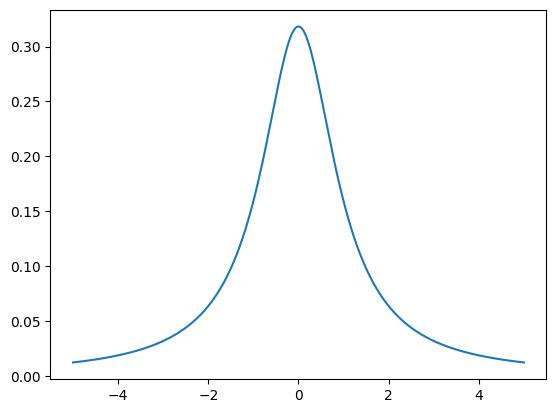

In [139]:
xs = np.linspace(-5,5,1000)
plt.plot(xs,g_c(xs,1,0))

In [101]:
for RP,m in zip(R_P,ms):
    for R,K in zip(RP,Ks):
        if ~np.isnan(R):
            print(m,K)

0.10101010101010101 2.562814070351759
0.10101010101010101 2.613065326633166
3.7373737373737375 3.4170854271356785
3.7373737373737375 3.4673366834170856
3.7373737373737375 3.5175879396984926
3.7373737373737375 3.5678391959798996
3.7373737373737375 3.6180904522613067
3.7373737373737375 3.6683417085427137
3.7373737373737375 3.7185929648241207
3.7373737373737375 3.7688442211055277
3.7373737373737375 3.819095477386935
3.7373737373737375 3.869346733668342
3.7373737373737375 3.919597989949749
3.7373737373737375 3.969849246231156
3.7373737373737375 4.020100502512563
3.7373737373737375 4.07035175879397
3.7373737373737375 4.120603015075377
3.7373737373737375 4.170854271356784
3.7373737373737375 4.2211055276381915
3.7373737373737375 4.2713567839195985
3.7373737373737375 4.3216080402010055
3.7373737373737375 4.371859296482413
3.7373737373737375 4.42211055276382
3.7373737373737375 4.472361809045227
3.7373737373737375 4.522613065326634
3.7373737373737375 4.572864321608041
3.7373737373737375 4.623115

In [27]:
plt.plot(K_,F_r['R_u'](K_))
plt.plot(K_,F_r['R_d'](K_))
plt.plot(Ks,F_r['r_+u'])
plt.plot(Ks,F_r['r_+0u'])

plt.plot(Ks,(F_r['R0_u'](Ks) - F_r['R_u'](Ks))/2)
# 

NameError: name 'K_' is not defined

In [108]:
from parfor import parfor
import TO_sim.Integrator_jit as IJ
from TO_sim.Kuramoto_model import Kuramoto_2nd_mf,Kuramoto_1st_mf
from TO_sim.gen_Distribution import Quantile_Normal as Q_Normal
from TO_sim.gen_Distribution import Quantile_Lorentzian as Q_Loren
RK4_jit_short = IJ.RK4_short
import pandas as pd

In [109]:
func = Kuramoto_2nd_mf

In [110]:
def assign_group_by_tolerance(df, tolerance):
    group_number = 0
    current_group_start = df['group abs rot'][0]  # 첫번째 값이 그룹의 시작 기준
    # 첫번째 값에 그룹 번호 할당
    df.at[0, 'Group'] = group_number
    
    # 두번째 값부터 확인하면서 그룹을 할당
    for i in range(1, len(df)):
        # 현재 값이 그룹 시작 값으로부터 tolerance 안에 있으면 같은 그룹으로 묶음
        if df['group abs rot'][i] - current_group_start <= tolerance:
            df.at[i, 'Group'] = group_number
        else:
            # 그룹 시작 값보다 tolerance를 벗어나면 새로운 그룹을 할당
            group_number += 1
            current_group_start = df['group abs rot'][i]  # 새로운 그룹 시작 값 갱신
            df.at[i, 'Group'] = group_number

    return df

def Get_Group(theta,t,L):
    th = (theta[-1]-theta[-L])//(np.pi*2)
    rs = np.abs(np.mean(np.exp(1j*theta[-L:]),axis=1))
    r = np.mean(rs)
    rstd = np.std(rs)
    th = th/(t[-1] - t[-L])
    # bins = np.arange(-3-0.05,3,0.1)
    c,b = np.histogram(th,bins=100)
    # c,b = np.histogram(th,bins=bins)
    c_sort = np.sort(c)[::-1]
    c_arg = np.argsort(c)[::-1]
    c_3, = np.where(c_sort>np.max(c)*(0.03))
    b_n0 = b[c_arg[c_3]]
    db = b[1] - b[0]

    N = len(theta[-1])
    gs = {}
    gs['group #'] = []
    gs['group rot'] = []
    gs['group idx'] = []
    if r>1/np.sqrt(N):
        num = 0
        for b_l in b_n0:
            if num == 0:
                idx, = np.where((th>=2*b_l)&(th<=b_l+2*db))
                gs['group idx'].append(idx)
                gs['group rot'].append(np.mean(th[idx])*(np.pi*2))
                gs['group #'].append(len(idx))
                num += 1
            else:
                idx, = np.where((th>=b_l)&(th<=b_l+db))
                gs['group idx'].append(idx)
                gs['group rot'].append(np.mean(th[idx])*(np.pi*2))
                gs['group #'].append(len(idx))
    df =  pd.DataFrame(gs)
    try:
        df['group abs rot'] = (df['group rot']-(df['group rot'].iloc[0]+df['group rot'].iloc[1])/2).apply(lambda x: np.abs(x))
        # if abs(df['group rot'].iloc[0])<0.3:
        df['group abs rot'] = (df['group rot']-(df['group rot'].iloc[0])).apply(lambda x: np.abs(x))
        # else:
            # df['group abs rot'] = (df['group rot']-(df['group rot'].iloc[0]+df['group rot'].iloc[1])/2).apply(lambda x: np.abs(x))
    except IndexError:
        df = pd.DataFrame()
        df[['group #','group rot','Group','g sign','r_m','r_std']] = None 
        columns = df.columns
        dat = [[N,None,'T',0,r,rstd]]
        df_S = pd.DataFrame(dat,columns=columns)
        df = pd.concat([df,df_S],axis=0)
        return df
    df = df.sort_values(by='group abs rot').reset_index(drop=True)
    df = assign_group_by_tolerance(df,0.1)
    def S_rho(x):
        L = len(x)
        a = theta[-L:,x]
        ST = np.sum(np.exp(a*1j),axis=1)
        rho = np.abs(ST/L)
        return rho
    df['rho_s'] = df['group idx'].apply(S_rho)
    df['r_m'] = df['rho_s'].apply(np.mean) * df['group #']/N
    df['r_std'] = df['rho_s'].apply(np.std) * df['group #']/N
    df['g sign'] = np.sign(df['group rot']) * np.sign(df['group abs rot'])
    df = df[['group #','group rot','Group','g sign','r_m','r_std']]
    columns = df.columns
    dat = [[N,None,'T',0,r,rstd]]
    df_S = pd.DataFrame(dat,columns=columns)
    df = pd.concat([df,df_S],axis=0)
    return df

In [129]:
seed =10
N = 5000
theta_random,omega,Kc = Q_Loren(N,0,1,seed=seed)

omega = omega - np.mean(omega)
omega = np.sort(omega)
m = 6.0
dt = 0.1
t = np.arange(0,10000,dt)
K = 5
L = N
to_ppi = lambda y: (y + np.pi)%(2*np.pi) - np.pi
# theta, dtheta,rs = mf2(K,N=N,m=m,t_array=t,p_theta=theta_random,p_dtheta=theta_random,p_omega=omega)
# plt.plot(np.sort(avg_dtheta[-1]))
# plt.plot((avg_dtheta[-1]))
Theta = np.r_[theta_random,omega]
Ks = np.arange(0,10,0.2)

In [120]:
from tqdm.notebook import tqdm

In [121]:
N = 500

In [130]:
@parfor(Ks,bar=True)
def K_f(K,L=4000):
    sol = RK4_jit_short(func,Theta,t, args=(omega, N, m, K),result_time=int(t[-5000]/dt))
    theta = sol[:,:N]
    df = Get_Group(theta,t,L)
    return df

  0%|          | 0/50 [00:00<?, ?it/s]

In [123]:
Ks = np.round(Ks,2)

In [131]:
Ks = np.round(Ks,2)
df_r = pd.DataFrame(index=np.round(Ks,2))
df_r[['rT','rTstd','0p','0m','0','1p','1m','2p','2m','3p','3m']] = None
for a,(K) in zip(K_f,Ks):
    df_r.loc[K,'rT'] = a[a['Group']=='T']['r_m'].values[0]
    df_r.loc[K,'rTstd'] = a[a['Group']=='T']['r_std'].values[0]
    for i in range(4):
        try:
            df_r.loc[K,f'{i}'] = a[(a['Group']==i)&(a['g sign']==0)]['r_m'].values[0]
        except:pass
        try:
            # print(a[(a['Group']==i)&(a['g sign']==1)]['r_m'].values[0])
            df_r.loc[K,f'{i}p'] = a[(a['Group']==i)&(a['g sign']==1)]['r_m'].values[0]
            df_r.loc[K,f'{i}m'] = a[(a['Group']==i)&(a['g sign']==-1)]['r_m'].values[0]
        except:pass



Text(0.5, 1.0, 'm = 6.0')

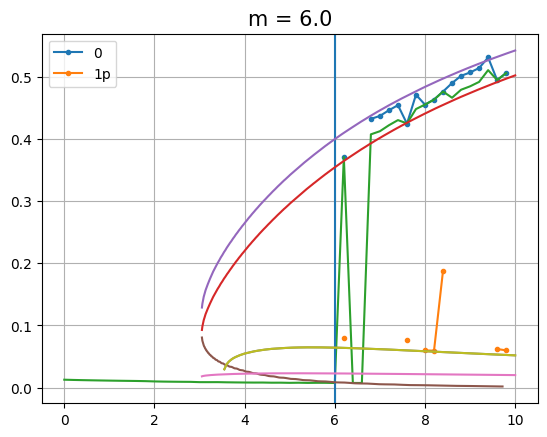

In [132]:
df_r[['0p','0m','0','1p','1m','2p','2m','3p','3m']].plot(style='.-')
plt.plot(df_r['rT'])
plt.grid()
plt.axvline(6.)
Ks = F_r['Ks']
plt.plot(K_,F_rN['R_u'](K_))
plt.plot(K_,F_rN['R0_u'](K_))
plt.plot(K_,F_rN['R_d'](K_))

plt.plot(K_,(F_rN['R0_u'](K_)-F_rN['R_u'](K_))/2)

plt.plot(Ks,F_rN['r_+u'])
plt.plot(Ks,F_rN['r_+u'])
# plt.plot(Ks,r_su_l,'r-')
# plt.plot(Ks,r_su_l*2)

plt.title(f'm = {m}',fontsize=15)

#